In [13]:
#Importing dependencies
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline
import itertools
import warnings


In [2]:
#Loading Data
data = pd.read_csv('C:/Pythondatasets/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 21:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,21,8.1,34,Good,10.0,UG/M3,1 Hr,Valid,5/9/2023 20:00,38623
2023-05-09 22:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,22,10.0,42,Good,12.0,UG/M3,1 Hr,Valid,5/9/2023 21:00,38624
2023-05-09 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,23,12.5,52,Moderate,15.0,UG/M3,1 Hr,Valid,5/9/2023 22:00,38625


In [3]:
df_new = data[['AQI']].copy()
df_new

,AQI
Date (LT),
2018-05-22 17:00:00,42
2018-05-22 18:00:00,59
2018-05-22 19:00:00,55
2018-05-22 20:00:00,61
2018-05-22 21:00:00,55
...,...
2023-05-09 21:00:00,34
2023-05-09 22:00:00,42
2023-05-09 23:00:00,52


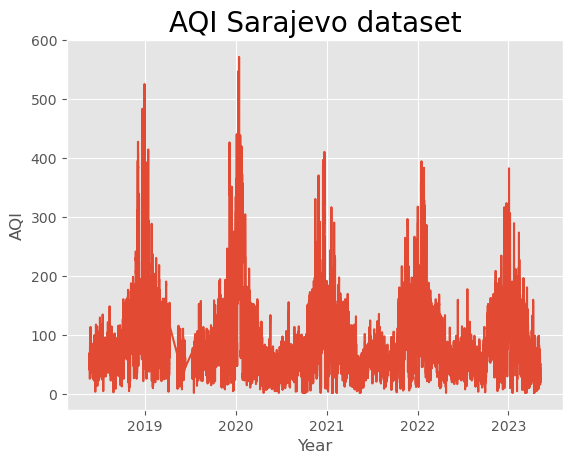

In [9]:
#vizualizacija vremenske serije
plt.title('AQI Sarajevo dataset', size=20)
plt.plot(df_new)
plt.xlabel("Year")
plt.ylabel("AQI")
plt.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo.png')

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df_new)

# Extract and print the test statistics and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -13.256514486987303
P-value: 8.566145658444163e-25


In [11]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
result = kpss(df_new)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: 0.34110547839341443
P-value: 0.1


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


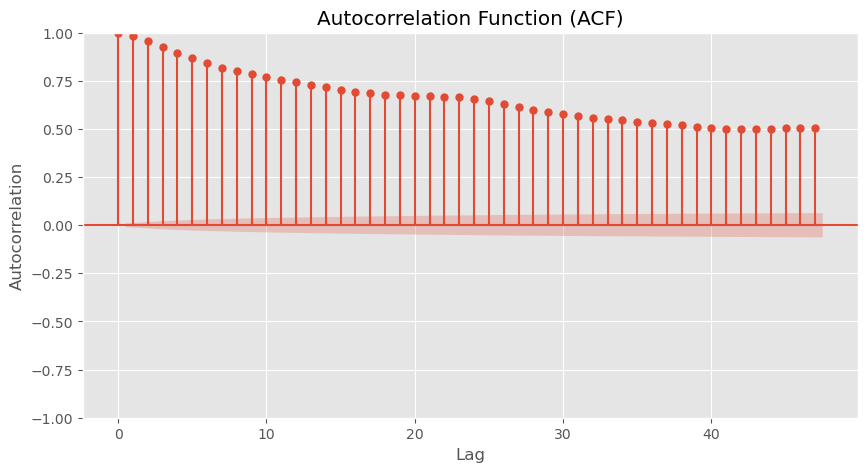

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


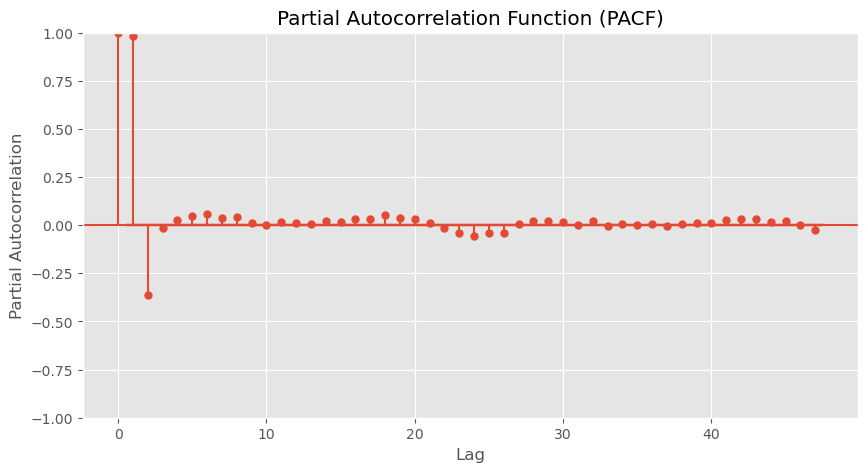

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_new, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_new, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [22]:
#data['AQI'] = data['AQI'].astype(int)
c = np.isinf(data['AQI']).values.sum()
print("It contains " + str(c) + " infinite values")

dataAQI = data.loc[(np.isinf(data['AQI']))]
dataAQI

dataAQI2 = data.loc[(data['diskretno_vrijeme']==16278.0)]
dataAQI2

It contains 0 infinite values


,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,


In [16]:
data = data.loc[(data['AQI']!=1)]
data

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Sarajevo,PM2.5 - Principal,2018-05-22 17:00:00,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid
1,Sarajevo,PM2.5 - Principal,2018-05-22 18:00:00,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid
2,Sarajevo,PM2.5 - Principal,2018-05-22 19:00:00,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid
3,Sarajevo,PM2.5 - Principal,2018-05-22 20:00:00,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid
4,Sarajevo,PM2.5 - Principal,2018-05-22 21:00:00,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41472,Sarajevo,PM2.5 - Principal,2023-04-30 21:00:00,2023,4,30,21,15.2,58,Moderate,21.0,UG/M3,1 Hr,Valid
41473,Sarajevo,PM2.5 - Principal,2023-04-30 22:00:00,2023,4,30,22,23.6,75,Moderate,32.0,UG/M3,1 Hr,Valid
41474,Sarajevo,PM2.5 - Principal,2023-04-30 23:00:00,2023,4,30,23,23.8,76,Moderate,24.0,UG/M3,1 Hr,Valid
41475,Sarajevo,PM2.5 - Principal,2023-05-01 00:00:00,2023,5,1,0,25.4,79,Moderate,27.0,UG/M3,1 Hr,Valid


In [23]:
data['AQI'] = data['AQI'].astype(int)
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,21,15.2,58,Moderate,21.0,UG/M3,1 Hr,Valid,4/30/2023 20:00,41472
2023-04-30 22:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,22,23.6,75,Moderate,32.0,UG/M3,1 Hr,Valid,4/30/2023 21:00,41473
2023-04-30 23:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,23,23.8,76,Moderate,24.0,UG/M3,1 Hr,Valid,4/30/2023 22:00,41474


In [13]:
#log transformacija vremenske serije
df_log = df_new
df_log['AQI']= np.log(df_log['AQI'])
df_log_return = df_log.diff().iloc[1: , :]

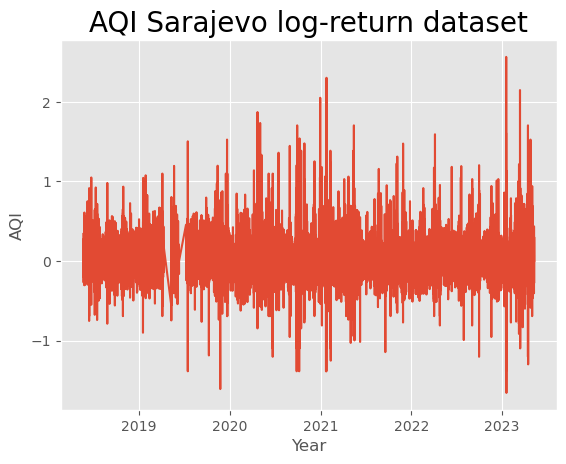

In [15]:
#vizualizacija log-return vremenske serije
plt.title('AQI Sarajevo log-return dataset', size=20)
plt.plot(df_log_return['AQI'])
plt.xlabel("Year")
plt.ylabel("AQI")
plt.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_log-return.png')
#time-plot ukazuje na promjene u varijansi, sto cemo rijesiti sezonalnim diferenciranjem u narednim koracima

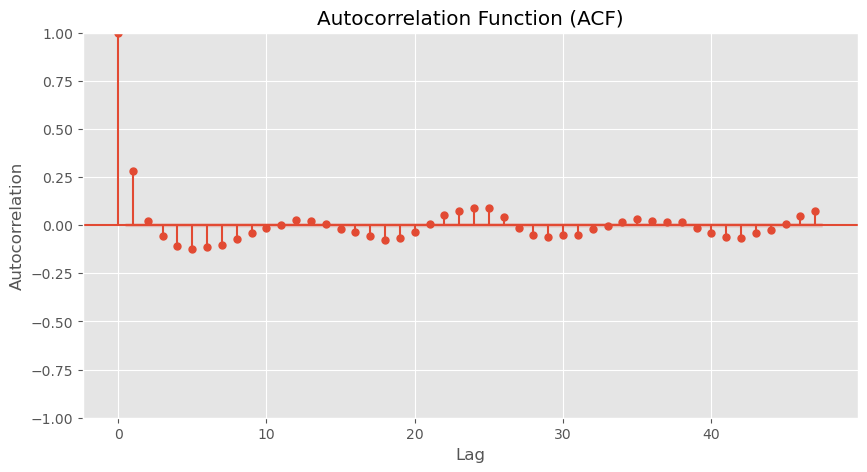

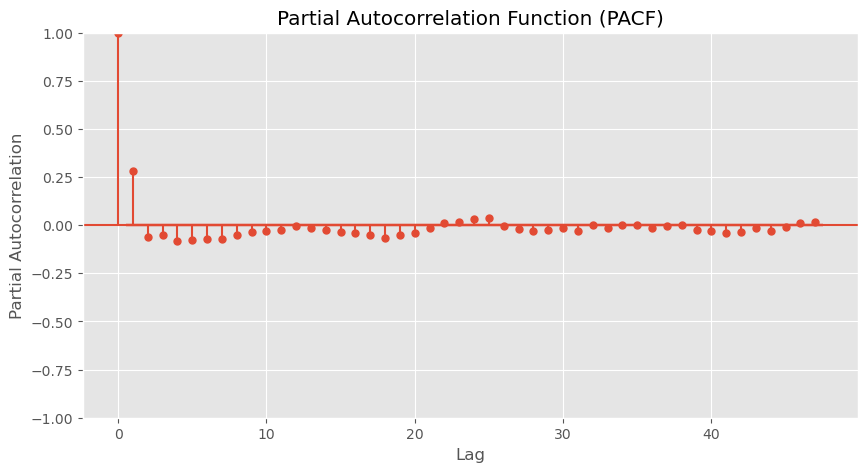

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_log_return, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_log-return_ACF.png')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df_log_return, ax=ax)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_log-return_PACF.png')
plt.show()

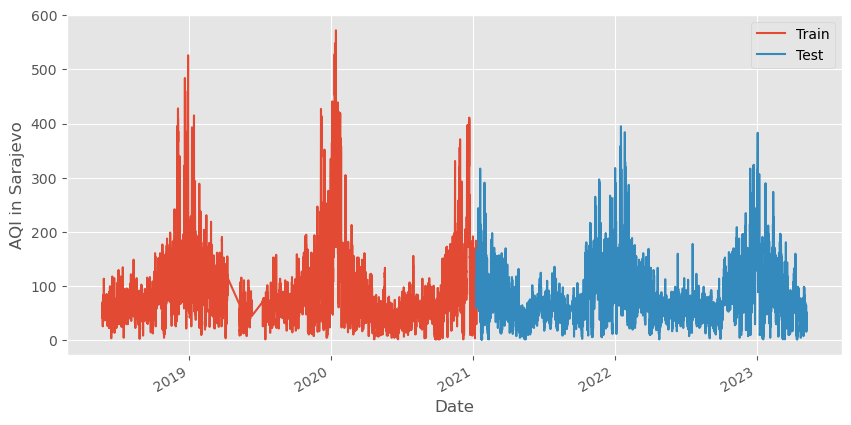

In [4]:
# Split into training and testing
df_train = df_new.loc[:'2021-01-10 01:00:00']
df_test = df_new.loc['2021-01-10 01:00:00':]

# Plot the last 10 years of training data and the 2 of testing
ax = df_train.plot(figsize=(10, 5))
df_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.xlabel('Date')
plt.ylabel('AQI in Sarajevo')
#plt.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_train_test.png')
plt.show()

In [5]:
import itertools
import math
import statsmodels.api as sm


# Define the range of values for p, d, q, P, D, Q, and m
p_values = range(0, 3)  # Autoregressive order
d_values = [0]          # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 2)  # Seasonal autoregressive order
D_values = range(0, 1)  # Seasonal differencing order
Q_values = range(0, 2)  # Seasonal moving average order
m_values = [12]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))

# Initialize AIC with a large value
best_aic = float("inf")  
best_params = None

# Perform grid search
for params in param_combinations:
    order = params[:3]
    seasonal_order = params[3:]
    
    
    model = sm.tsa.SARIMAX(df_train, order=order, seasonal_order=seasonal_order)
    result = model.fit(disp=False)
    aic = result.aic
    print(result)
        # Ensure the convergence of the model
    if not math.isinf(result.zvalues.mean()):
        print(order, seasonal_order, aic)
        
        if aic < best_aic:
            best_aic = aic
            best_params = params
                
    else:
        print(order, seasonal_order, 'not converged')

    

# Print the best parameters and AIC
print("Best Parameters:", best_params)
print("Best AIC:", best_aic)

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 0, 0, 12) 263687.53683795116


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (0, 0, 1, 12) 248447.19362925872


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 0, 12) 225927.57424396364


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0, 0, 0) (1, 0, 1, 12) 224199.72741660022


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 1) (0, 0, 0, 12) 236253.14290292177


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 1) (0, 0, 1, 12) 221793.7863254118


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 1) (1, 0, 0, 12) 203605.56251858422


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 1) (1, 0, 1, 12) 200515.97293404787


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 2) (0, 0, 0, 12) 215367.2414683575


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 2) (0, 0, 1, 12) 203905.14434402916


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 2) (1, 0, 0, 12) 190462.4955826655


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 0, 2) (1, 0, 1, 12) 187261.96065839648


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 0, 12) 165712.3962480341


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (0, 0, 1, 12) 165712.56737225357


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 0, 12) 165712.1392088136


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 0) (1, 0, 1, 12) 165327.9253132919


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 0, 0, 12) 163442.896475447


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (0, 0, 1, 12) 163444.7340708932


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 0, 12) 163444.93434368202


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 1) (1, 0, 1, 12) 163152.9136159792


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 2) (0, 0, 0, 12) 163024.47863209347


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 2) (0, 0, 1, 12) 163026.07569045806


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 2) (1, 0, 0, 12) 163026.00827764516


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(1, 0, 2) (1, 0, 1, 12) 162728.1865332368


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 0) (0, 0, 0, 12) 163011.83877436584


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 0) (0, 0, 1, 12) 163012.90414126447


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 0) (1, 0, 0, 12) 163012.76120299424


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 0) (1, 0, 1, 12) 162690.43773403627


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 1) (0, 0, 0, 12) 162990.80223376496


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 1) (0, 0, 1, 12) 162991.5127081909


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 1) (1, 0, 0, 12) 162991.27385266134


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 1) (1, 0, 1, 12) 162638.7680278017


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 2) (0, 0, 0, 12) 162964.51502286328


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 2) (0, 0, 1, 12) 162965.41970442218


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(2, 0, 2) (1, 0, 0, 12) 162965.27261994698


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2) (1, 0, 1, 12) 162628.45232435974
Best Parameters: (2, 0, 2, 1, 0, 1, 12)
Best AIC: 162628.45232435974


In [9]:
model = sm.tsa.SARIMAX(df_train,
                       order=best_params[:3],
                       seasonal_order=best_params[3:])
result = model.fit(disp=False)

# Show the summary
result.summary()


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                21467
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood              -81307.226
Date:                              Tue, 29 Aug 2023   AIC                         162628.452
Time:                                      15:34:53   BIC                         162684.272
Sample:                                           0   HQIC                        162646.652
                                            - 21467                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3526      0.023     58.590      0.000       1.307       1.398
ar.L2         -0.3792      0.022    -16.859      0.000      -0.423      -0.335
ma.L1         -0.0534      0.024     -2.243      0.025      -0.100      -0.007
ma.L2          0.0432      0.008      5.147      0.000       0.027       0.060
ar.S.L12       0.9921      0.001    800.796      0.000       0.990       0.995
ma.S.L12      -0.9616      0.003   -383.541      0.000      -0.967      -0.957
sigma2       114.0504      0.360    316.779      0.000     113.345     114.756
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            368160.05
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
my_order, my_seasonal_order, trend = [(2, 0, 1), (1, 0, 0, 12), 'ct']
model = SARIMAX(df_train, order=my_order, seasonal_order=my_seasonal_order, trend=trend)

result = model.fit(disp=False)

# Show the summary
result.summary()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 AQI   No. Observations:                21467
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood              -89978.547
Date:                             Tue, 29 Aug 2023   AIC                         179971.094
Time:                                     16:11:43   BIC                         180026.914
Sample:                                          0   HQIC                        179989.294
                                           - 21467                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7583      0.089     19.773      0.000       1.584       1.933
drift         -0.0001    7.4e-06    -15.827      0.000      -0.000      -0.000
ar.L1          1.4488      0.006    243.325      0.000       1.437       1.460
ar.L2         -0.4676      0.006    -77.410      0.000      -0.479      -0.456
ma.L1         -0.1338      0.007    -19.988      0.000      -0.147      -0.121
ar.S.L12       0.9099      0.002    433.143      0.000       0.906       0.914
sigma2       114.8942      0.337    340.466      0.000     114.233     115.556
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            137043.97
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

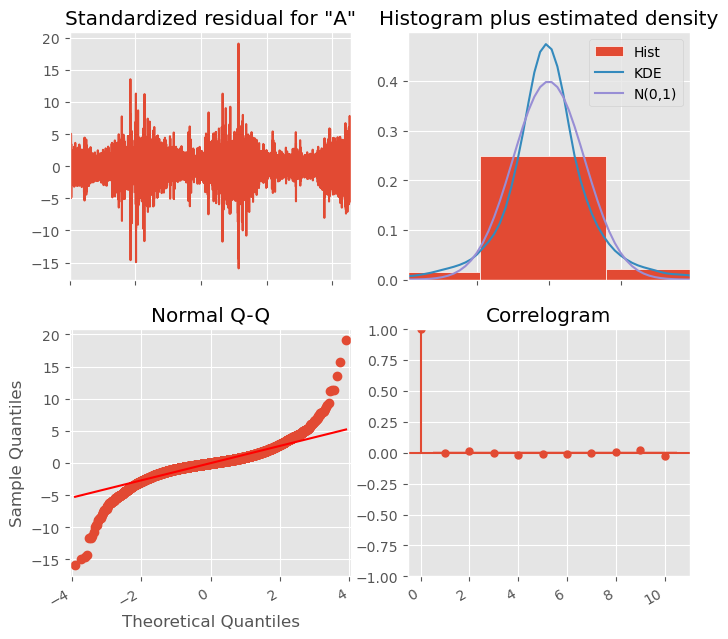

In [39]:
# Display the model diagnostics
fig = result.plot_diagnostics(figsize=(8, 8))
fig.autofmt_xdate()
plt.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_model_diagnostics.png')
plt.show()

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


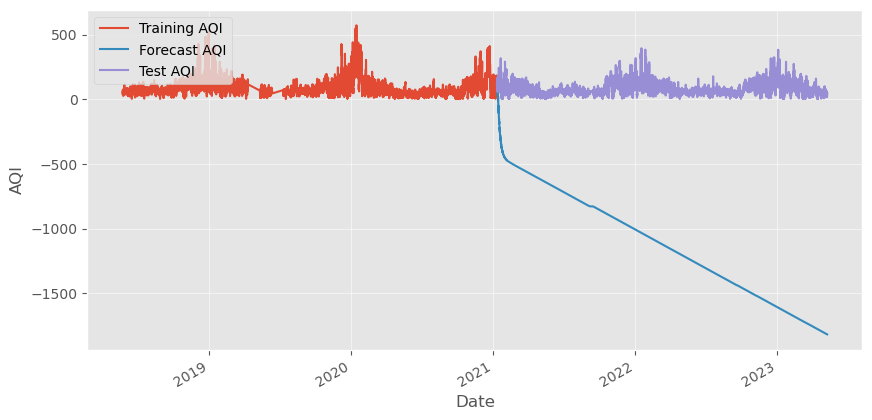

In [40]:
forecast = result.get_forecast(steps=20004)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_values.index=df_test.index

# Plot forecast with training data
ax = df_train.plot(figsize=(10,5))
forecast_values.plot()
df_test.plot(ax=ax)

plt.legend(['Training AQI', 
            'Forecast AQI', 
            'Test AQI'], 
           loc='upper left')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(alpha=0.5)
plt.show()

In [37]:
forecast_values

Date (LT)
2021-01-10 01:00:00    123.075947
2021-01-10 02:00:00    123.884917
2021-01-10 03:00:00    120.508814
2021-01-10 04:00:00    117.542294
2021-01-10 05:00:00    114.294851
                          ...    
2023-05-09 21:00:00      0.000164
2023-05-09 22:00:00      0.000164
2023-05-09 23:00:00      0.000169
2023-05-10 00:00:00      0.000177
2023-05-10 01:00:00      0.000182
Name: predicted_mean, Length: 20004, dtype: float64

In [34]:
df_test

,AQI
Date (LT),
2021-01-10 01:00:00,117
2021-01-10 02:00:00,114
2021-01-10 03:00:00,112
2021-01-10 04:00:00,82
2021-01-10 05:00:00,74
...,...
2023-05-09 21:00:00,34
2023-05-09 22:00:00,42
2023-05-09 23:00:00,52


In [10]:
for table in result.summary().tables:
    print(table.as_latex_tabular())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &               AQI                & \textbf{  No. Observations:  } &   21467     \\
\textbf{Model:}           & SARIMAX(2, 0, 2)x(1, 0, [1], 12) & \textbf{  Log Likelihood     } & -81307.226  \\
\textbf{Date:}            &         Tue, 29 Aug 2023         & \textbf{  AIC                } & 162628.452  \\
\textbf{Time:}            &             15:35:03             & \textbf{  BIC                } & 162684.272  \\
\textbf{Sample:}          &                0                 & \textbf{  HQIC               } & 162646.652  \\
\textbf{}                 &              - 21467             & \textbf{                     } &             \\
\textbf{Covariance Type:} &               opg                & \textbf{                     } &             \\
\bottomrule
\end{tabular}
%\caption{SARIMAX Results}
\end{center}
\begin{center}
\begin{tabular}{lcccccc}
\toprule
                  & \textbf{coef} & \textbf{std err} & \textbf

In [27]:
df_train

,AQI
Date (LT),
2018-05-22 17:00:00,42
2018-05-22 18:00:00,59
2018-05-22 19:00:00,55
2018-05-22 20:00:00,61
2018-05-22 21:00:00,55
...,...
2021-01-09 21:00:00,31
2021-01-09 22:00:00,30
2021-01-09 23:00:00,60


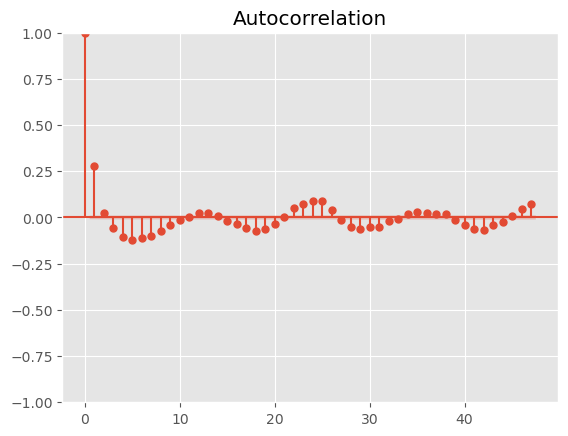

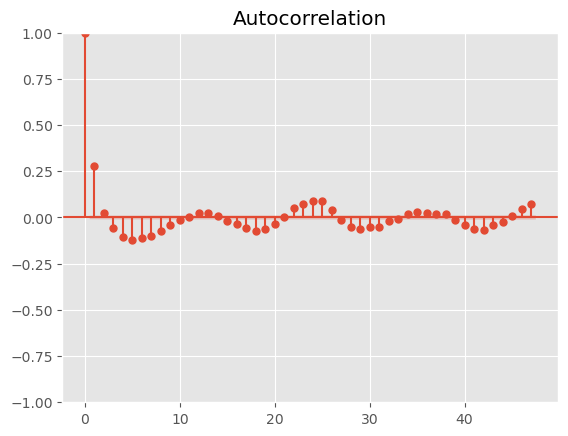

In [44]:
#odredjivanje parametra D (sezonalnog diferenciranja) koristeci acf
plot_acf(df_log_return)

In [83]:
# diferenciranje za uklanjanje sezonalnosti
df_log_return_S = df_log_return.diff(12).dropna(axis=0)
display(df_log_return_S)

,AQI
Date (LT),
2018-05-23 09:00:00,-0.301402
2018-05-23 10:00:00,0.210786
2018-05-23 11:00:00,-0.071280
2018-05-23 12:00:00,0.054751
2018-05-23 13:00:00,-0.220543
...,...
2023-04-30 21:00:00,0.498664
2023-04-30 22:00:00,0.350571
2023-04-30 23:00:00,-0.062262


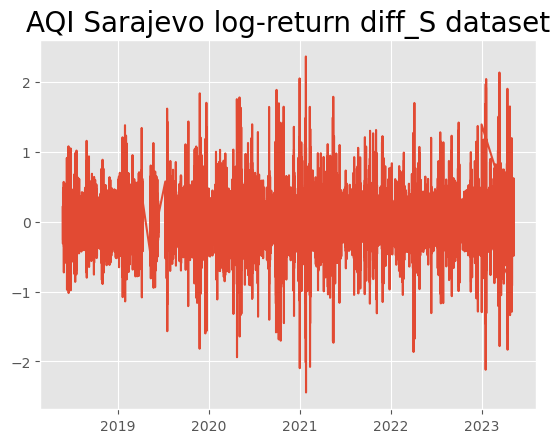

In [84]:
#vizualizacija log-return sezonalno diferencirane vremenske serije
plt.title('AQI Sarajevo log-return diff_S dataset', size=20)
plt.plot(df_log_return_S['AQI'])

In [85]:
#ispitivanje stacionarnosti log-return sezonalno diferencirane serije ADF i KPSS testovima
display(adfuller(df_log_return_S, autolag='AIC'))
display(kpss(df_log_return_S, regression="c", nlags='auto'))

#za ADF test posmatramo drugu vrijednost u nizu 5.721576723091915e-09 sto je <0.05 pa smo prosli ADF test
#za KPSS test posmatramo takodjer drugu vrijednost 0.1 sto je >0.05 pa smo i ovaj test prosli
#zakljucujemo da je log-return serija stacionarna

(-43.13330678150533,
 0.0,
 55,
 41398,
 {'1%': -3.430507971533042,
  '5%': -2.861609819853588,
  '10%': -2.5668071628545706},
 -26946.03249631125)

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0017988752391024814,
 0.1,
 137,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [3]:
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(data['AQI'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -13.306768389393573
p-value: 6.872771924518939e-25


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


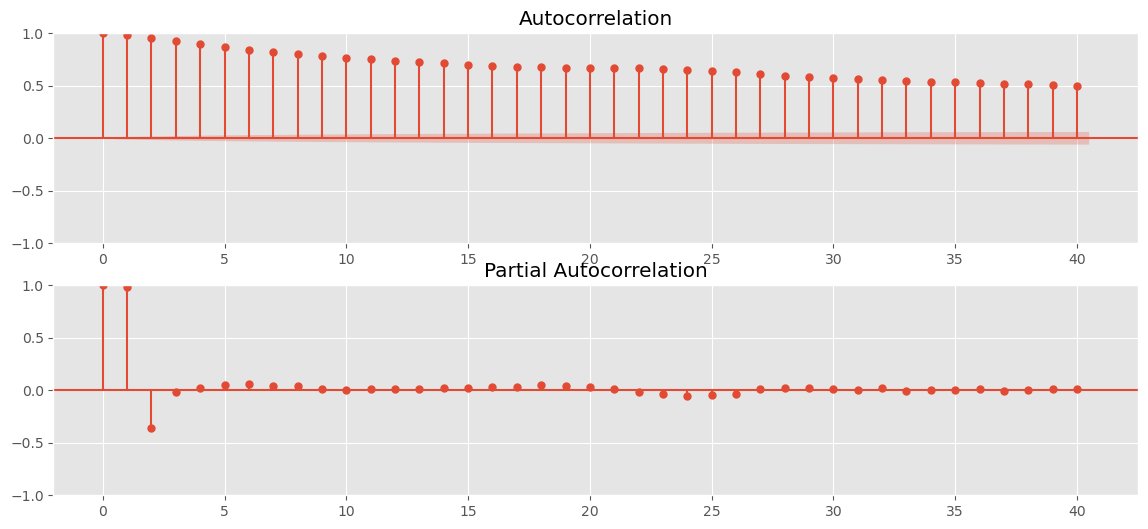

In [4]:
#ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['AQI'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['AQI'].dropna(),lags=40,ax=ax2)

In [5]:
series = data['AQI'].squeeze()
X = series
size = int(len(X)* 0.66)
train, test = X[0:size], X[size:len(X)]

In [6]:
# SARIMA model
from pmdarima import auto_arima
model=auto_arima(y=series, m=12)

In [7]:
# Predictions
predictions = pd.Series(model.predict(n_periods=len(test)))
predictions.index = test.index
predictions

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Date (LT)
2021-09-24 01:00:00    77.848949
2021-09-24 02:00:00    77.409109
2021-09-24 03:00:00    77.500025
2021-09-24 04:00:00    77.326772
2021-09-24 05:00:00    77.353936
                         ...    
2023-04-30 21:00:00    77.353936
2023-04-30 22:00:00    77.353936
2023-04-30 23:00:00    77.353936
2023-05-01 00:00:00    77.353936
2023-05-01 01:00:00    77.353936
Length: 14103, dtype: float64

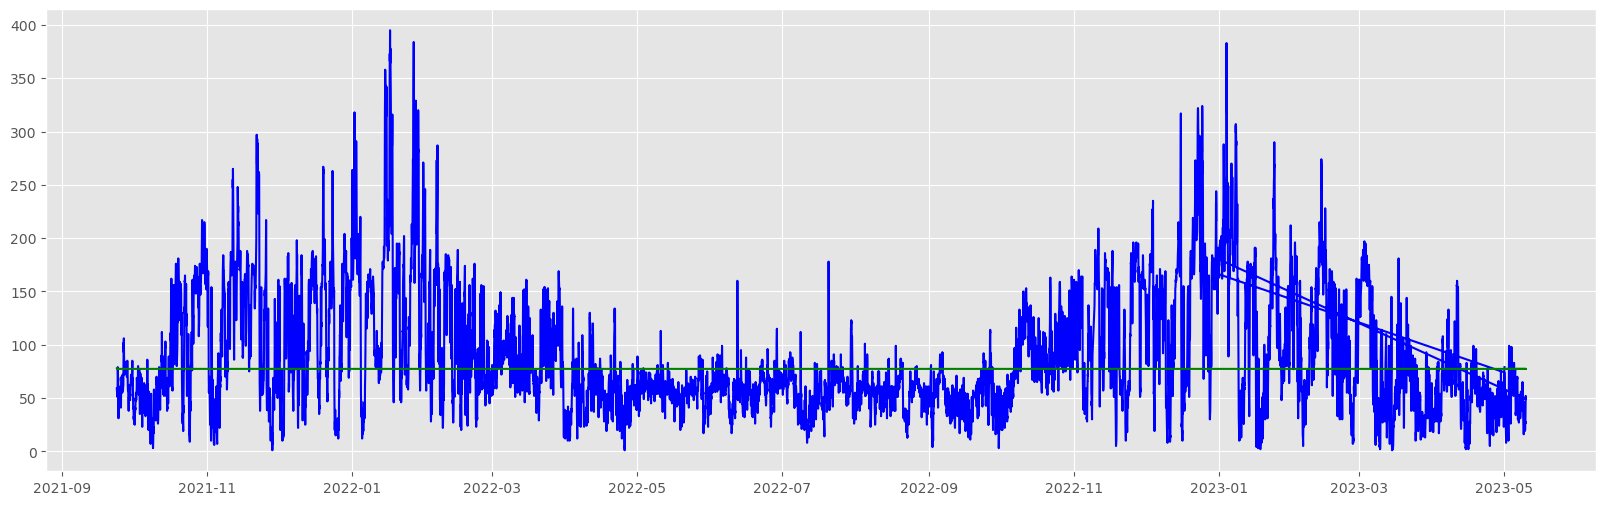

In [8]:
# Visualization
plt.figure(figsize=(20,6))
plt.plot(test, color='blue', label='test')
plt.plot(predictions, color='green', label='prediction')

In [ ]:
# SARIMA model
from pmdarima import auto_arima
model2=auto_arima(y=series, m=365)

In [1]:
predictions

NameError: name 'predictions' is not defined